<a href="https://colab.research.google.com/github/nunufung/sentiment_stockprice/blob/main/Sentiment_Stockprice_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Install and Importing necessary libraries:

In [ ]:
!pip install pystan==2.19.1.1
!pip install requests
!pip install textblob
!pip install fbprophet
!pip install feedparser
!pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 8.1 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import yfinance as yf
import feedparser
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from fbprophet import Prophet

Retrieving news articles from News API:

In [ ]:
import requests

url = 'https://newsapi.org/v2/top-headlines?country=us&category=business&apiKey=e34da7bd93a44269a032f180ce871c85'
response = requests.get(url)
data = response.json()

for article in data['articles']:
    headline = article['title']
    description = article['description']
    source = article['source']['name']
    # do something with the article information


Performing sentiment analysis on news articles:

In [ ]:
import requests
from textblob import TextBlob
import pandas as pd

company_list = ['apple', 'OpenAI','Sensetime','equnix']
sentiments = []

for company in company_list:
    url = f"https://newsapi.org/v2/everything?q={company}&apiKey=e34da7bd93a44269a032f180ce871c85"
    response = requests.get(url)
    news = response.json()['articles']
    for article in news:
        title = article['title']
        description = article['description']
        content = article['content']
        blob = TextBlob(content)
        sentiment = blob.sentiment.polarity
        sentiments.append([company, title, description, content, sentiment])

df = pd.DataFrame(sentiments, columns=['Company', 'Title', 'Description', 'Content', 'Sentiment'])


[*********************100%***********************]  1 of 1 completed

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


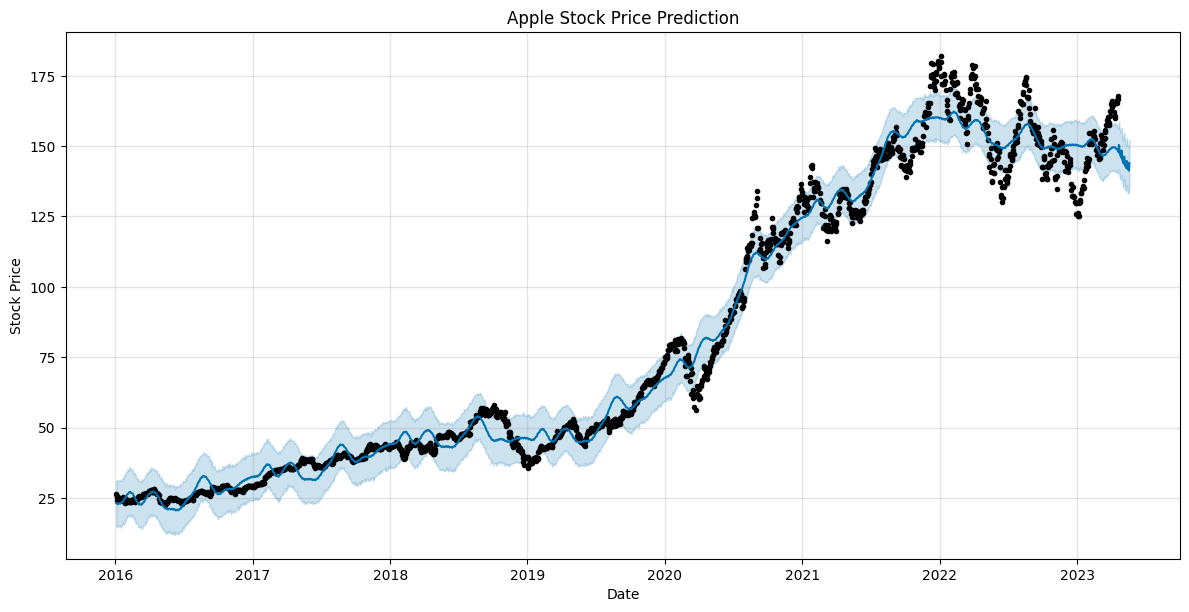

           Date  Predicted Price
1862 2023-05-16       141.794321
1863 2023-05-17       141.701364
1864 2023-05-18       141.496326
1865 2023-05-19       141.254501
1866 2023-05-20       143.924127


In [ ]:
import requests
from textblob import TextBlob
import pandas as pd
import yfinance as yf
from fbprophet import Prophet

# Define the list of companies to analyze
company_list = ['apple', 'OpenAI','Sensetime','equnix']
sentiments = []

# Scrape news articles and calculate sentiment for each company
for company in company_list:
    url = f"https://newsapi.org/v2/everything?q={company}&apiKey=e34da7bd93a44269a032f180ce871c85"
    response = requests.get(url)
    news = response.json()['articles']
    for article in news:
        title = article['title']
        description = article['description']
        content = article['content']
        blob = TextBlob(content)
        sentiment = blob.sentiment.polarity
        sentiments.append([company, title, description, content, sentiment])

# Convert the sentiments list into a dataframe
df = pd.DataFrame(sentiments, columns=['Company', 'Title', 'Description', 'Content', 'Sentiment'])

# Download stock data for Microsoft
msft = yf.download('AAPL', start='2016-01-01', end='2023-04-21')
msft.reset_index(inplace=True)
msft = msft[['Date', 'Close']]
msft = msft.rename(columns={'Date': 'ds', 'Close': 'y'})

# Create a Prophet model and fit it to the Microsoft data
model = Prophet()
model.fit(msft)

# Make predictions for the next 30 days
future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)

# Plot the predicted stock price
fig, ax = plt.subplots(figsize=(12, 6))
model.plot(forecast, ax=ax)
plt.title('Apple Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.show()

# Show the last 5 rows of the predicted stock price
forecast_table = forecast[['ds', 'yhat']].tail()
forecast_table = forecast_table.rename(columns={'ds': 'Date', 'yhat': 'Predicted Price'})
print(forecast_table)


[*********************100%***********************]  1 of 1 completed

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


            Stock Price
Date                   
2023-04-21   147.900203
2023-04-22   150.403789
2023-04-23   150.151674
2023-04-24   147.451631
2023-04-25   147.120174
2023-04-26   146.847451
2023-04-27   146.439510
2023-04-28   145.974992
2023-04-29   148.405780
2023-04-30   148.093162
2023-05-01   145.345865
2023-05-02   144.981190
2023-05-03   144.689881
2023-05-04   144.278368
2023-05-05   143.825435
2023-05-06   146.282859
2023-05-07   146.011563
2023-05-08   143.319645
2023-05-09   143.023524
2023-05-10   142.812812
2023-05-11   142.492578
2023-05-12   142.140045
2023-05-13   144.705251
2023-05-14   144.547241
2023-05-15   141.972136
2023-05-16   141.794321
2023-05-17   141.701364
2023-05-18   141.496326
2023-05-19   141.254501
2023-05-20   143.924127


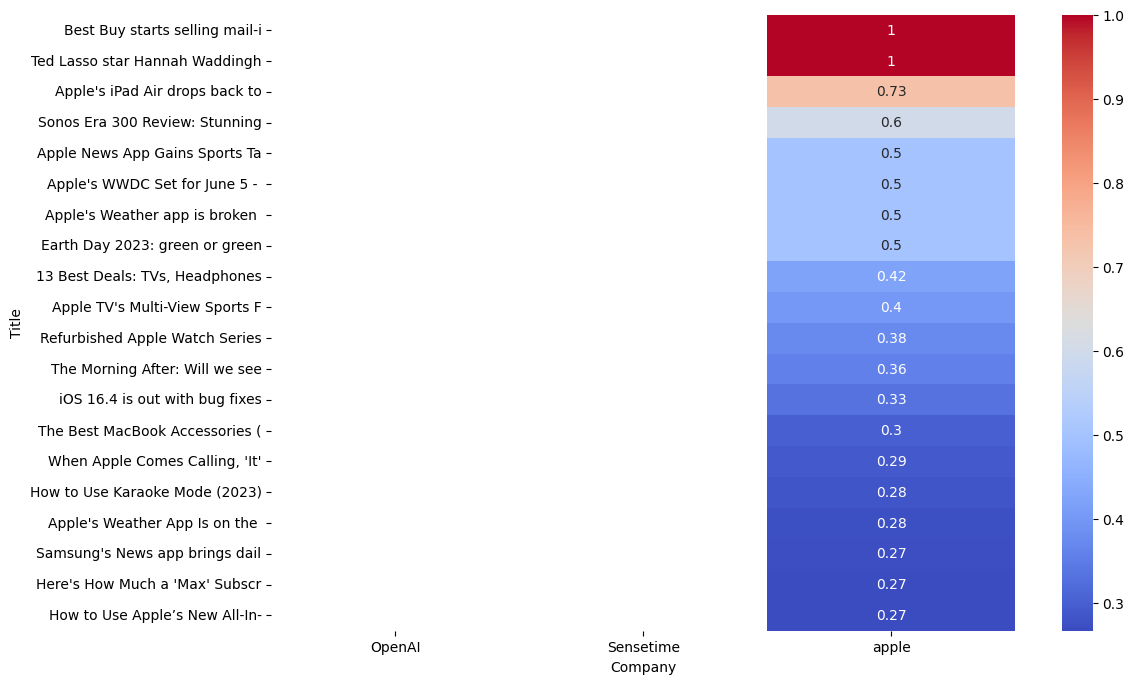

In [ ]:
import requests
from textblob import TextBlob
import pandas as pd
import yfinance as yf
from fbprophet import Prophet
import seaborn as sns

company_list = ['apple', 'OpenAI','Sensetime','equnix']
sentiments = []

for company in company_list:
    url = f"https://newsapi.org/v2/everything?q={company}&apiKey=e34da7bd93a44269a032f180ce871c85"
    response = requests.get(url)
    news = response.json()['articles']
    for article in news:
        title = article['title']
        description = article['description']
        content = article['content']
        blob = TextBlob(content)
        sentiment = blob.sentiment.polarity
        sentiments.append([company, title, description, content, sentiment])

df = pd.DataFrame(sentiments, columns=['Company', 'Title', 'Description', 'Content', 'Sentiment'])

start_date = '2016-01-01'
end_date = '2023-04-21'

sensetime = yf.download('AAPL', start=start_date, end=end_date)
sensetime.reset_index(inplace=True)
sensetime = sensetime[['Date', 'Close']]
sensetime = sensetime.rename(columns={'Date': 'ds', 'Close': 'y'})
model = Prophet()
model.fit(sensetime)

future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)

# Create a table of stock prices
prices = forecast[['ds', 'yhat']].tail(30)
prices = prices.set_index('ds')
prices.index.name = 'Date'
prices = prices.rename(columns={'yhat': 'Stock Price'})

# Create a heatmap of key words
df['KeyWords'] = df['Title'].str.findall(r'\b\w{5,}\b')
keywords = pd.Series([word for words in df['KeyWords'] for word in words]).value_counts().nlargest(20)
top_keywords = pd.DataFrame({'Keyword': keywords.index, 'Frequency': keywords.values})
pivot_df = pd.pivot_table(df, values='Sentiment', columns='Company', index=df['Title'].str[:30], aggfunc='mean')
top_pivot_df = pivot_df.nlargest(20, 'apple')
plt.figure(figsize=(12, 8))
sns.heatmap(top_pivot_df, annot=True, cmap='coolwarm')

# Display the table and heatmap
print(prices)
plt.show()
